# Задача 1. Предсказание уровня удовлетворённости сотрудника

## Шаг 1. Загрузка данных 

In [1]:
!pip install scikit-learn==1.1.3 

     |████████████████████████████████| 30.8 MB 76 kB/s eta 0:00:011
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
pip -q install phik 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, make_scorer 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
import phik 
from warnings import simplefilter

In [4]:
RANDOM_STATE = 42 
TEST_SIZE = 0.25 

In [5]:
job_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', decimal='.', sep=',')
test_features = pd.read_csv('/datasets/test_features.csv', decimal='.', sep=',')
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', decimal='.', sep=',') 

In [6]:
job_satisfaction.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [7]:
test_features.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [8]:
test_target.head() 

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Данные загружены, на следующем шаге изучим из подробнее и проведем предобработку при необходимости 

## Шаг 2. Предобработка данных 

Начнем с первой таблицы job_satisfaction - тренировочной выборки 

In [9]:
job_satisfaction.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [10]:
job_satisfaction.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [11]:
job_satisfaction.duplicated().sum() 

0

In [12]:
job_satisfaction.isna().sum() 

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [13]:
job_satisfaction['dept'].unique() 

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [14]:
job_satisfaction['level'].unique() 

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [15]:
job_satisfaction[job_satisfaction.isnull().any(1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Есть значения nan, будем иметь в виду. В остальном все в порядке. 

Перейдем к второй таблице - test_features, входные признаки тестовой выборки 

In [16]:
test_features.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [17]:
test_features.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [18]:
test_features[test_features.isnull().any(1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


In [19]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [21]:
test_features['level'].unique() 

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [22]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

Далее третья таблица - test_target, целевой признак тестовой выборки 

In [24]:
test_target.head() 

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [25]:
test_target.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [26]:
test_target.duplicated().sum() 

0

Мы изучили данные - предобработка не потребовалась: дубликатов и пропусков нет, типы данных соответсвуют значениям. 

## Шаг 3. Исследовательский анализ данных 

Проведем исследовательский анализ данных 

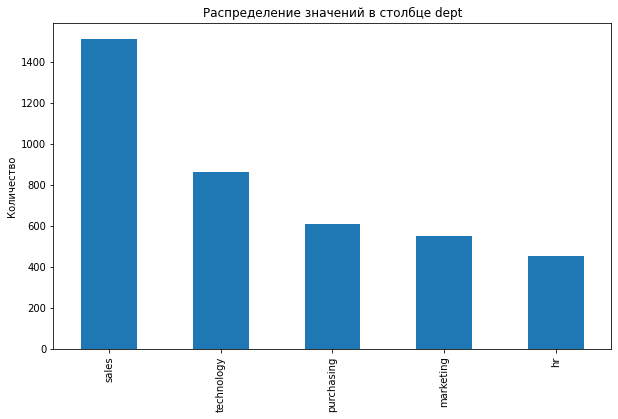

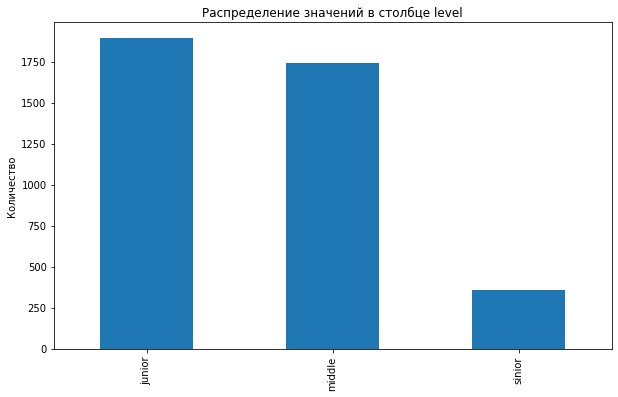

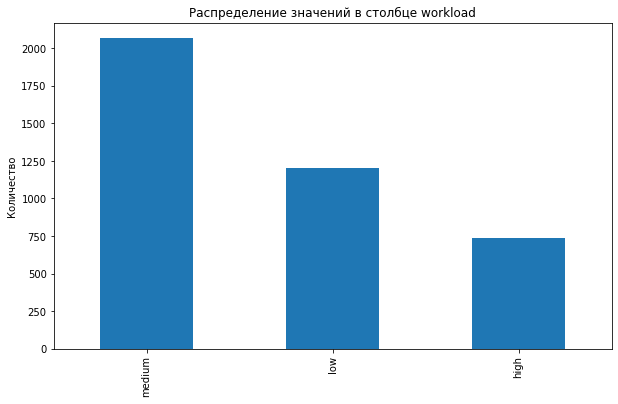

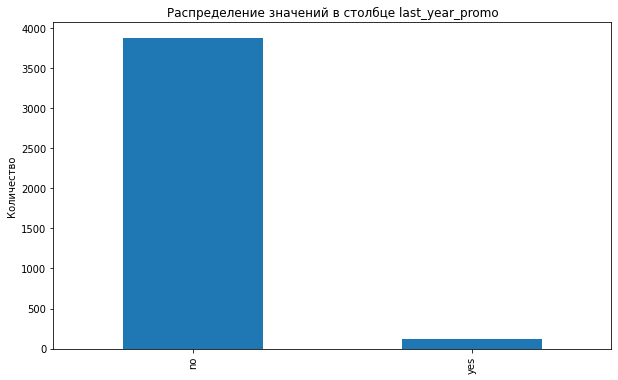

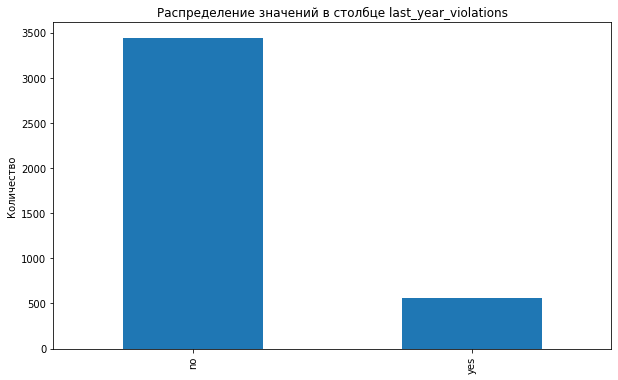

In [27]:
for column in job_satisfaction.columns:
    if job_satisfaction[column].dtype == 'object':  
            value_counts = job_satisfaction[column].value_counts()

            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Распределение значений в столбце {column}')
            plt.ylabel('Количество')
            plt.show() 

По графикам видно, что почти ни у кого не было повышения за последний год и почти никто не нарушал трудовой договор. 
Большинство сотрудников имеют средний уровень загрузки, меньше всего среди сотрудников специалистов уровня senior. 

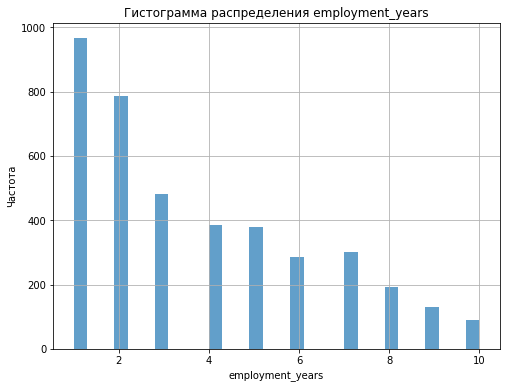

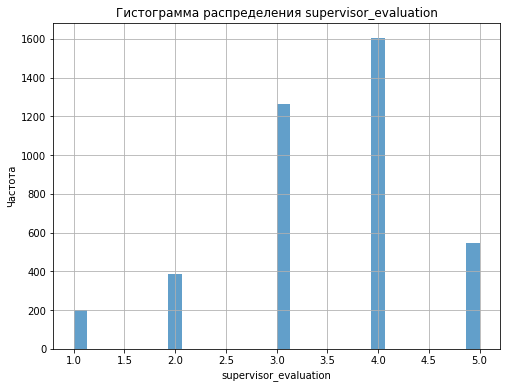

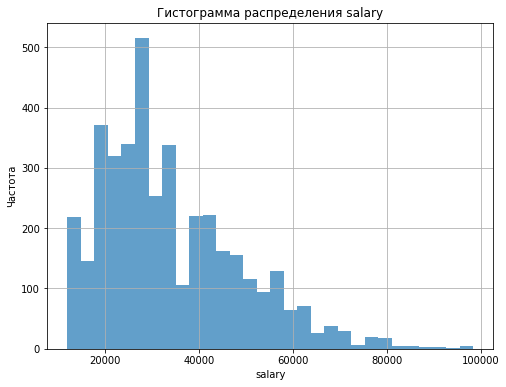

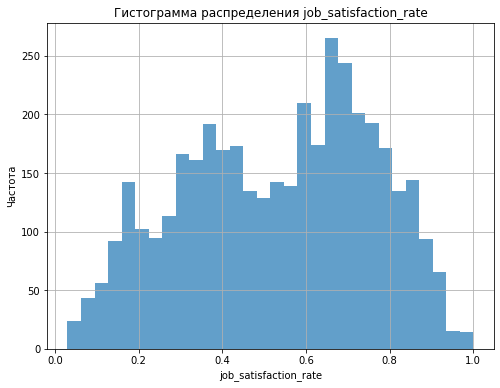

In [28]:
for column in job_satisfaction.columns:
    if (job_satisfaction[column].dtype != 'object') and (column != 'id'):  
        value_counts = job_satisfaction[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(job_satisfaction[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show() 

По графикам видно, что сотрубники работают в компании от 1 до 10 лет, в средним их хорошо оценивает руководитель (3-4), 
удовлетворенность работой неоднозначна. 

In [29]:
num_col=['salary', 'job_satisfaction_rate']
titles_num = ['ежемесячная зарплата сотрудника', 'уровень удовлетворённости сотрудника работой'] 

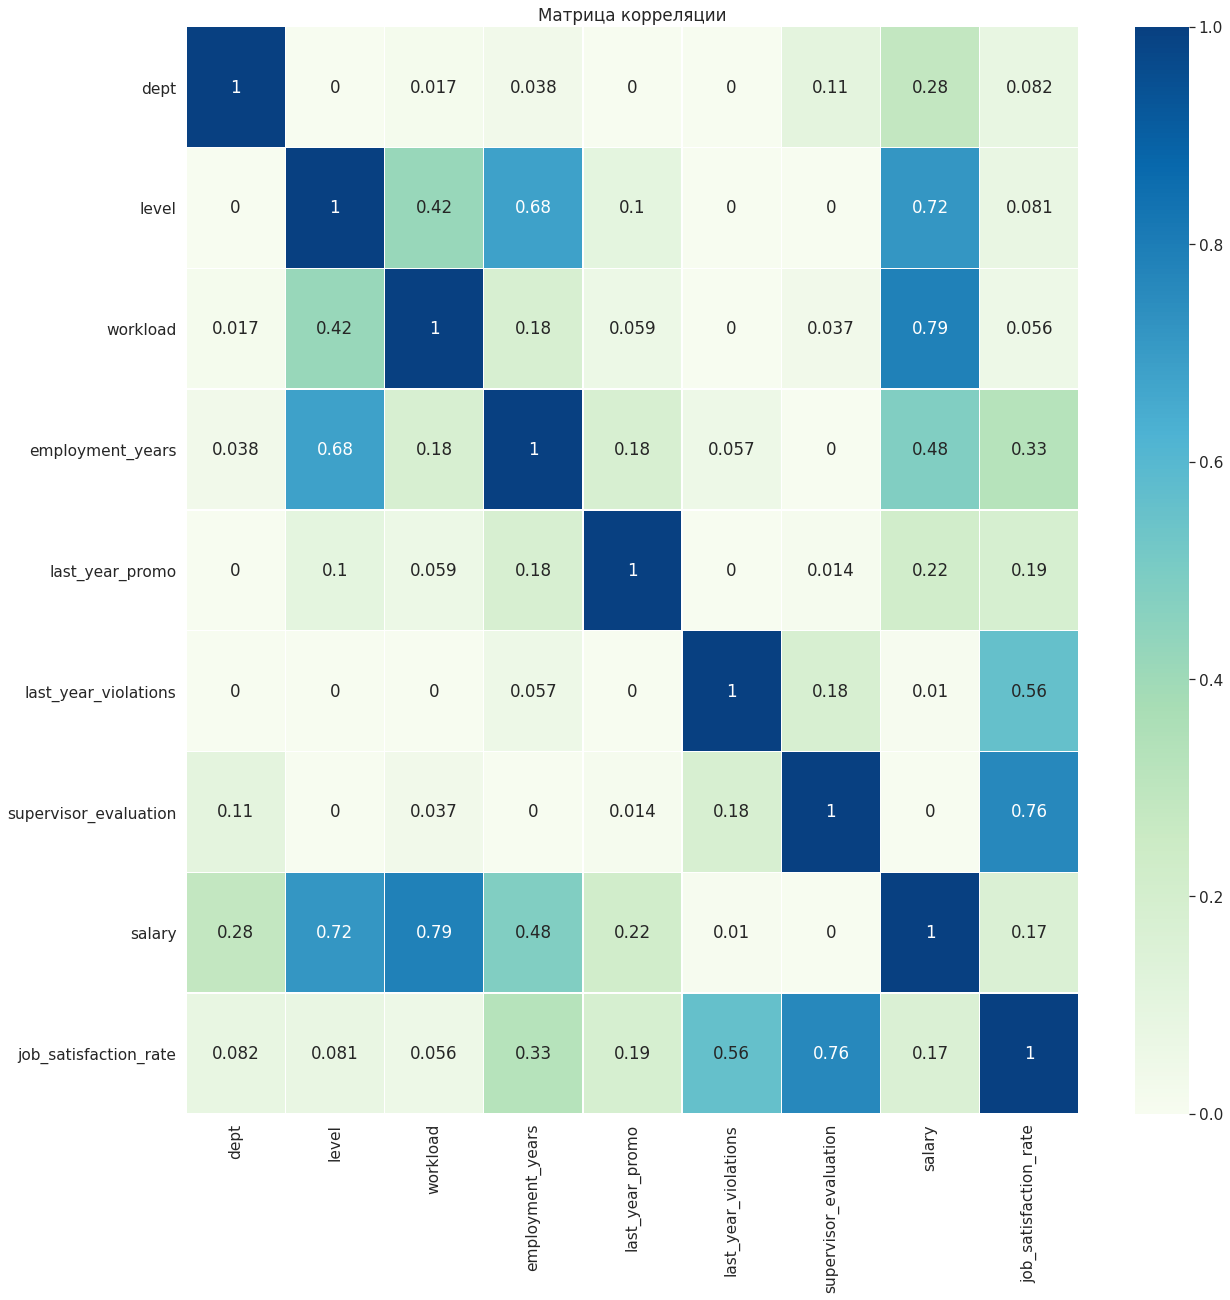

In [30]:
job_satisfaction_1=job_satisfaction.drop(['id'], axis=1)
corr_matrix = job_satisfaction_1.phik_matrix(interval_cols = num_col)
sns.set(font_scale=1.4)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')
plt.title('Матрица корреляции')
plt.show()

По таблице корреляции видим сильную зависимость целевого признака job_satisfaction_rate от supervisor_evaluation (оценка качества работы, которую дал руководитель), далее идет зависимость от last_year_violations (нарушал ли сотрудник договор за последний год), затем от employment_years (длительность работы в компании) 

Далее рассмотрим test_features 

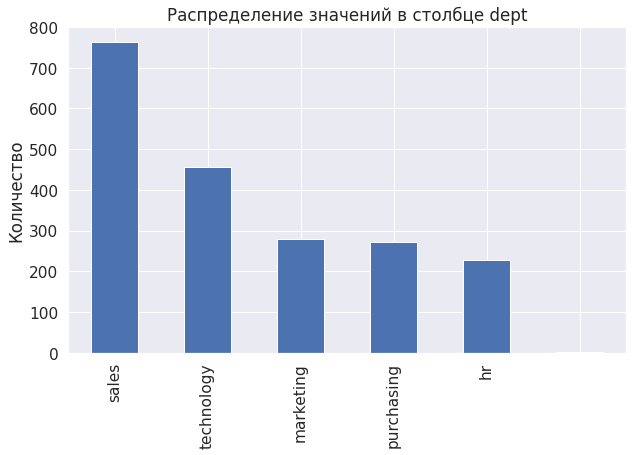

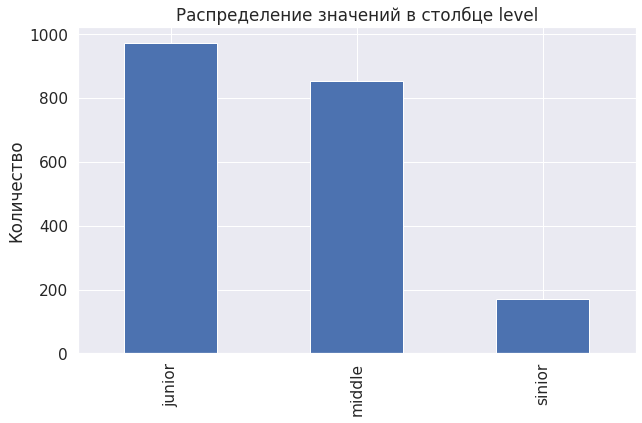

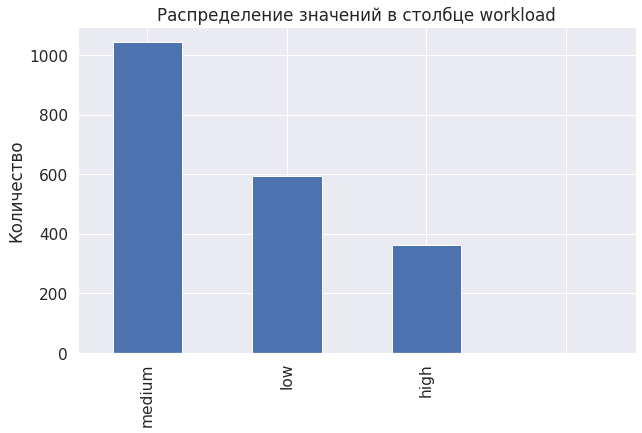

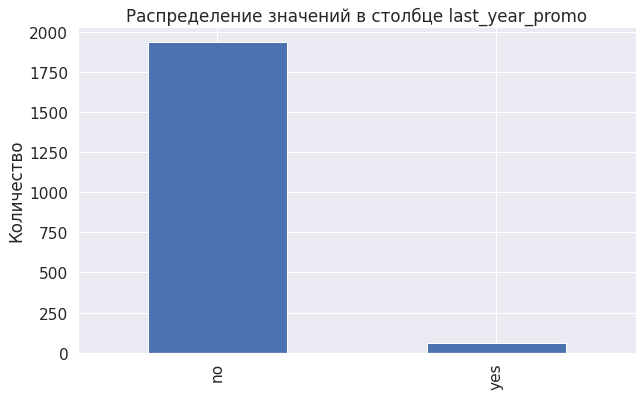

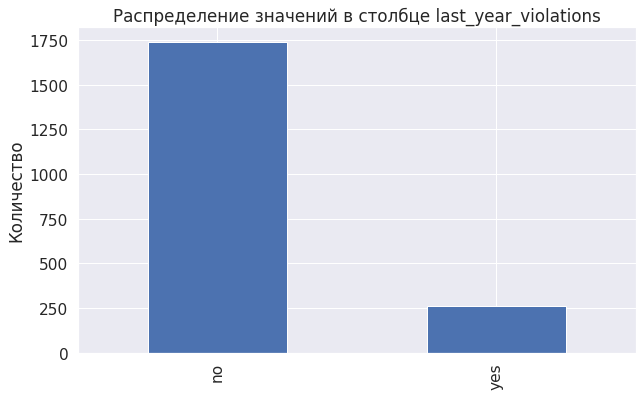

In [31]:
for column in test_features.columns:
    if test_features[column].dtype == 'object':  
            value_counts = test_features[column].value_counts()

            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Распределение значений в столбце {column}')
            plt.ylabel('Количество')
            plt.show() 

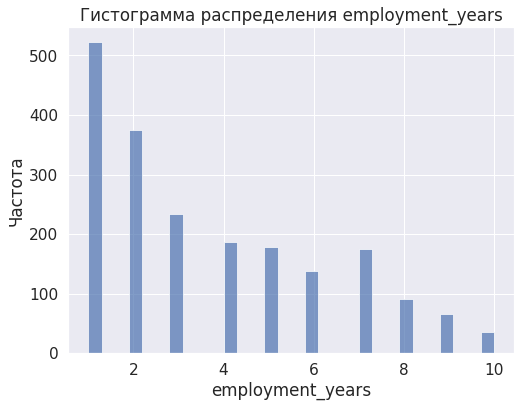

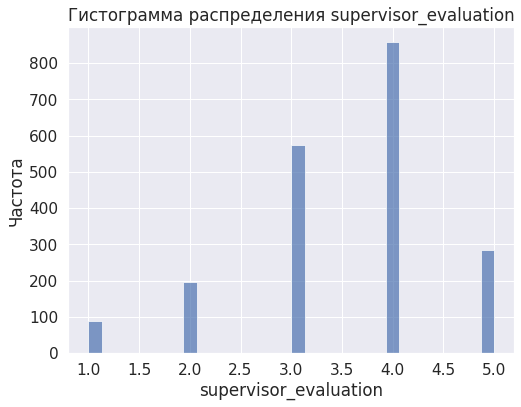

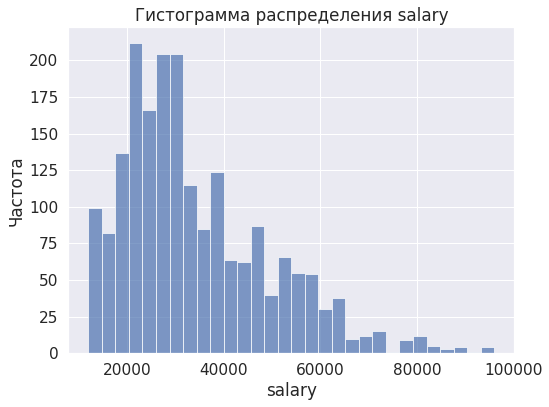

In [32]:
for column in test_features.columns:
    if (test_features[column].dtype != 'object') and (column != 'id'):  
        value_counts = test_features[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(test_features[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show() 

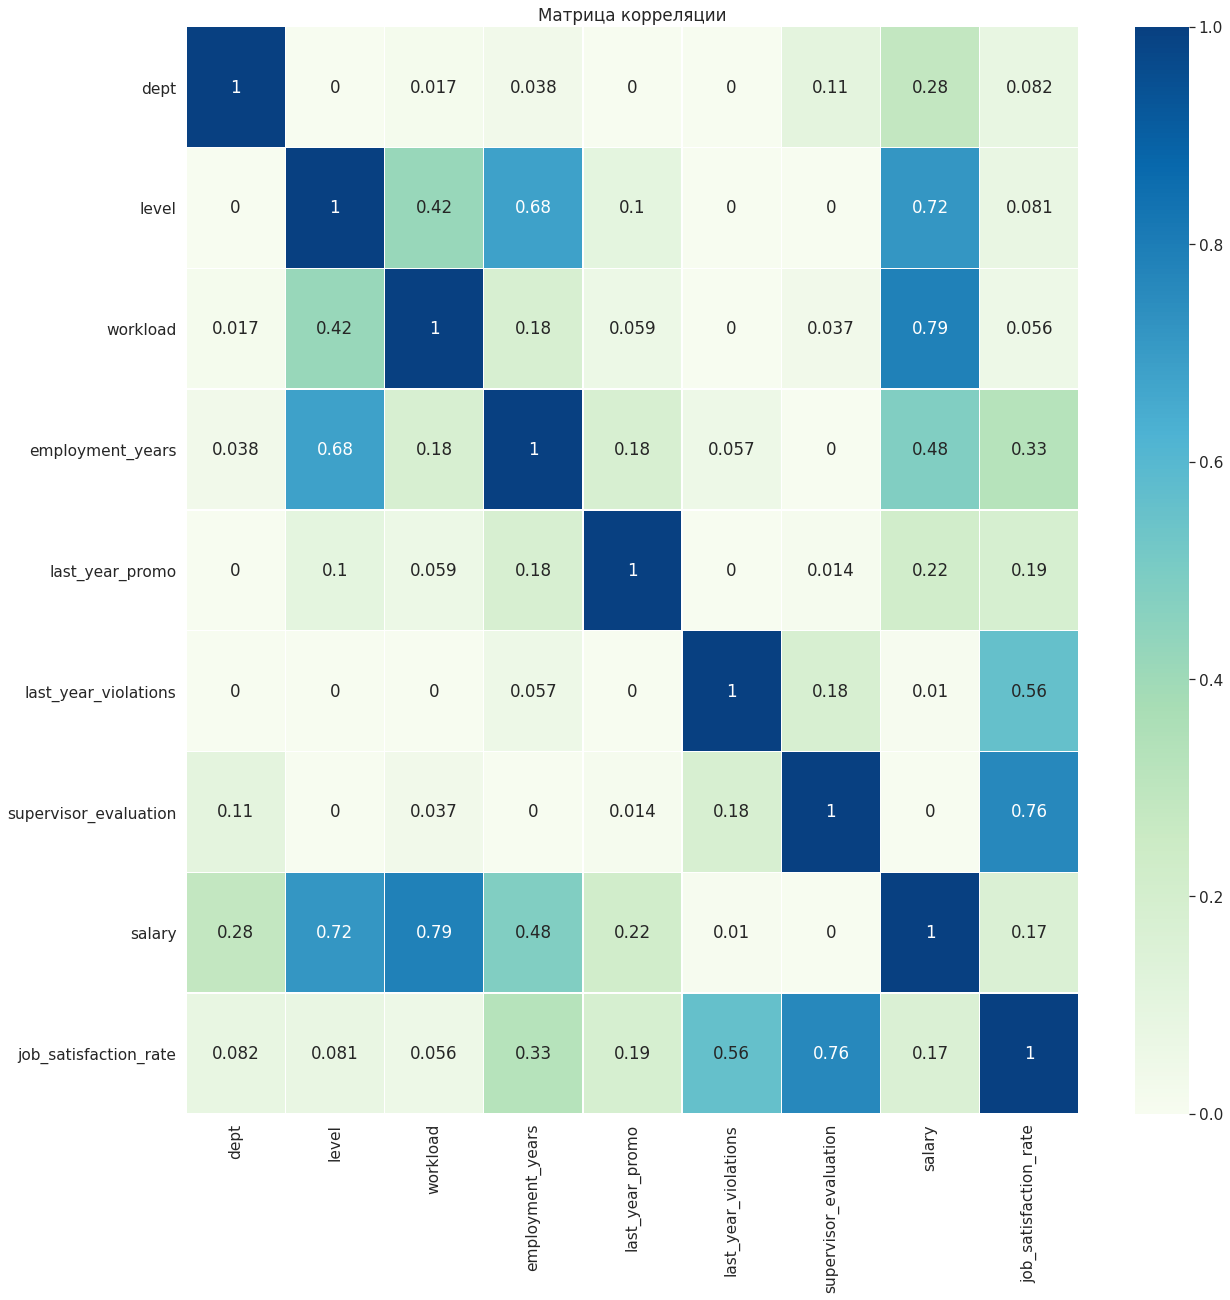

In [33]:
test_features_1=test_features.drop(['id'], axis=1)
corr_matrix = job_satisfaction_1.phik_matrix(interval_cols = num_col)
sns.set(font_scale=1.4)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')
plt.title('Матрица корреляции')
plt.show()

Отношения между признаками тестовой выборки идентичны тренировочной выборке 

## Шаг 4. Подготовка данных

Подготовку проведём в пайплайне. Необходимо сделать:

- кодировать с помощью OneHotEncoder: dept, last_year_promo, last_year_violations 
- кодировать с помощью OrdinalEncoder: level, workload 
- масштабировать количественные признаки: employment_years, supervisor_evaluation, salary 


## Шаг 5. Обучение моделей 

In [34]:
train = job_satisfaction.drop(['id'], axis=1) 

In [35]:
train.duplicated().sum() 

245

In [36]:
train.drop_duplicates(inplace=True)

In [37]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3749 non-null   object 
 1   level                  3751 non-null   object 
 2   workload               3755 non-null   object 
 3   employment_years       3755 non-null   int64  
 4   last_year_promo        3755 non-null   object 
 5   last_year_violations   3755 non-null   object 
 6   supervisor_evaluation  3755 non-null   int64  
 7   salary                 3755 non-null   int64  
 8   job_satisfaction_rate  3755 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 293.4+ KB


In [38]:
X_train = train.drop('job_satisfaction_rate', axis=1)
y_train = train['job_satisfaction_rate'] 

In [39]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations'] 
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [40]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')) 
    ]
) 

In [41]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

In [42]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [43]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
]) 

In [44]:
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__min_samples_split': range(2, 21),
        'models__max_features': range(2, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
] 

In [45]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) 

smape_scorer = make_scorer(score_func=smape, greater_is_better=False) 

In [46]:
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=10,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
r_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели на тренировочной выборке:', round(r_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                   

In [47]:
result = pd.DataFrame(r_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(10))

   rank_test_score                                       param_models  \
6                1  DecisionTreeRegressor(max_depth=17, max_featur...   
9                2  DecisionTreeRegressor(max_depth=17, max_featur...   
0                3  DecisionTreeRegressor(max_depth=17, max_featur...   
4                4  DecisionTreeRegressor(max_depth=17, max_featur...   
8                5  DecisionTreeRegressor(max_depth=17, max_featur...   
5                6  DecisionTreeRegressor(max_depth=17, max_featur...   
2                7  DecisionTreeRegressor(max_depth=17, max_featur...   
3                8  DecisionTreeRegressor(max_depth=17, max_featur...   
7                9  DecisionTreeRegressor(max_depth=17, max_featur...   
1               10  DecisionTreeRegressor(max_depth=17, max_featur...   

   mean_test_score                                             params  
6       -15.201603  {'preprocessor__num': 'passthrough', 'models__...  
9       -15.356888  {'preprocessor__num': 'passthrou

In [48]:
test_features = test_features.merge(test_target, on='id', how='left')
X_test = test_features.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = test_features['job_satisfaction_rate']
best_model = r_search.best_estimator_
print(f'Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_*(-1),4)}') 

Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: 15.2016


In [49]:
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),4)}') 

Метрика SMAPE лучшей модели на тестовой выборке: 13.6724


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [50]:
X_train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

Мы обучили модели и выбрали лучшую с использованием пайплайна. 

Лучшая модель - DecisionTreeRegressor(max_depth=17, max_features=12, min_samples_split=12, random_state=42) 

Метрика SMAPE лучшей модели на тренировочных данных данных: 15.2016

Метрика sMAPE лучшей модели на тестовой выборке: 13.6706 

# Задача 2. Предсказание увольнения сотрудника из компании 


## Шаг 1. Загрузка данных 

In [51]:
train_quit = pd.read_csv('/datasets/train_quit.csv', decimal='.', sep=',')
test_features_2 = pd.read_csv('/datasets/test_features.csv', decimal='.', sep=',')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', decimal='.', sep=',')  

In [52]:
train_quit.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [53]:
train_quit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [54]:
test_features_2.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [55]:
test_features_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [56]:
test_target_quit.head() 

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [57]:
test_target_quit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Данные загруженв успешно, далее рассмотрим их подробнее  

## Шаг 2. Предобработка данных  

In [58]:
train_quit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [59]:
train_quit.duplicated().sum()

0

In [60]:
train_quit['dept'].unique() 

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [61]:
train_quit['level'].unique() 

array(['middle', 'junior', 'sinior'], dtype=object)

In [62]:
train_quit['workload'].unique() 

array(['high', 'medium', 'low'], dtype=object)

In [63]:
train_quit['last_year_promo'].unique() 

array(['no', 'yes'], dtype=object)

In [64]:
train_quit['supervisor_evaluation'].unique() 

array([4, 1, 3, 5, 2])

In [65]:
train_quit['quit'].unique() 

array(['no', 'yes'], dtype=object)

In [66]:
test_features_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [67]:
test_features_2.duplicated().sum() 

0

In [68]:
test_features_2['dept'].unique() 

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [69]:
#test_features_2['dept'] = test_features_2['dept'].replace(' ', np.nan)

In [70]:
test_features_2['level'].unique() 

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [71]:
test_features_2['workload'].unique() 

array(['medium', 'low', 'high', ' '], dtype=object)

In [73]:
test_features_2['last_year_promo'].unique() 

array(['no', 'yes'], dtype=object)

In [74]:
test_features_2['supervisor_evaluation'].unique() 

array([5, 4, 3, 1, 2])

In [75]:
test_target_quit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [76]:
test_target_quit.duplicated().sum()


0

In [77]:
test_target_quit['quit'].unique() 

array(['yes', 'no'], dtype=object)

На этом шаге мы провели предобработку данные. В таблице входных признаков были заменены пропуски на nan, в остальном пропусков и дубликатов не выявлено. 

## Шаг 3. Исследовательский анализ данных 


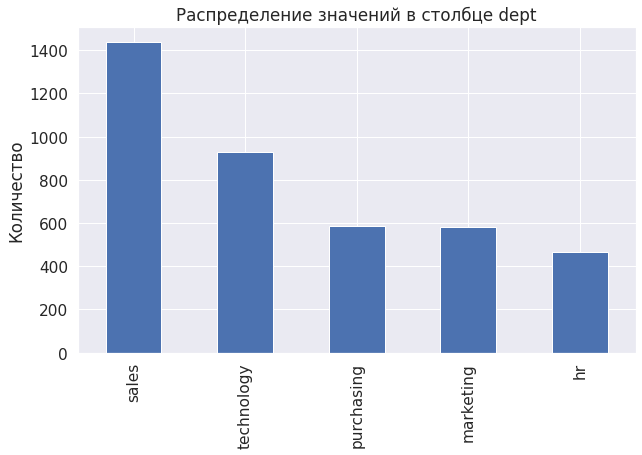

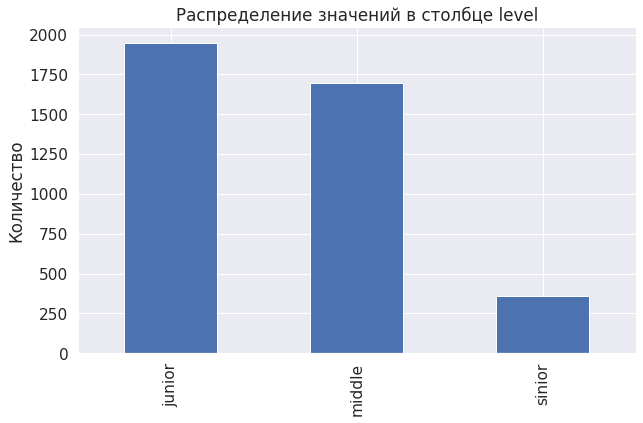

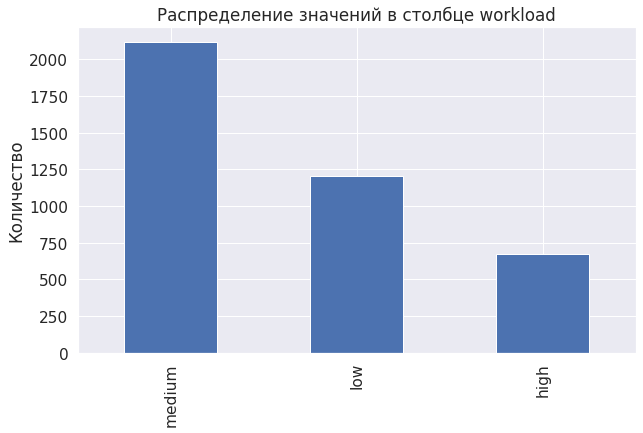

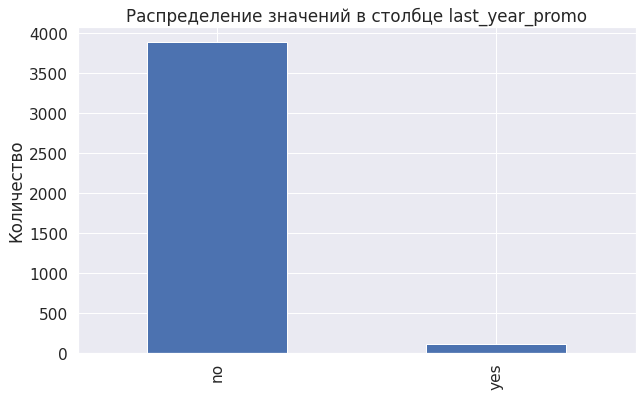

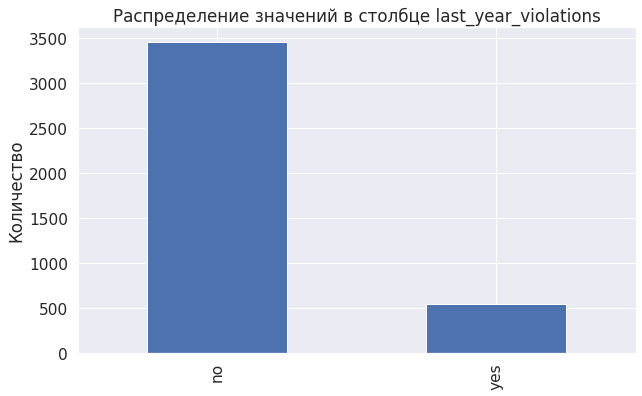

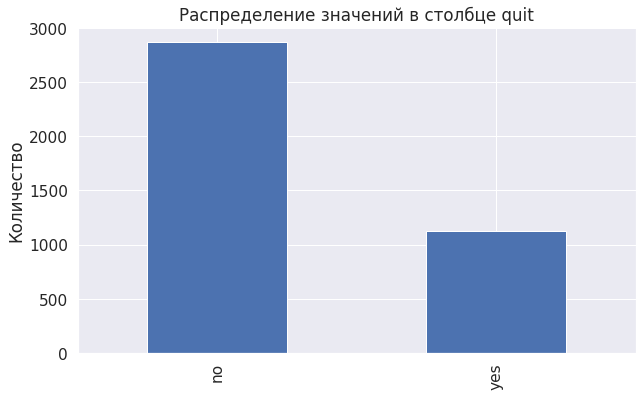

In [78]:
for column in train_quit.columns:
    if train_quit[column].dtype == 'object':  
            value_counts = train_quit[column].value_counts()

            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Распределение значений в столбце {column}')
            plt.ylabel('Количество')
            plt.show() 

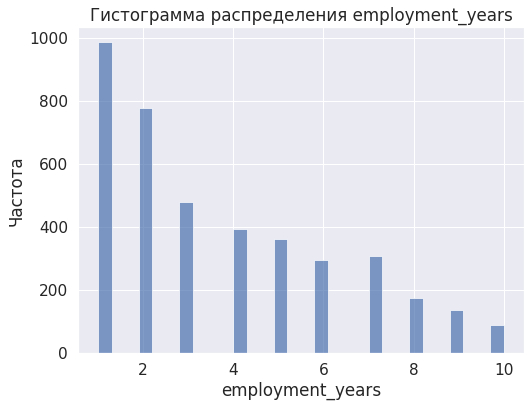

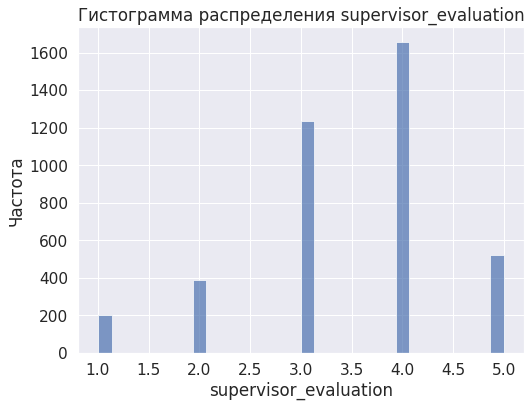

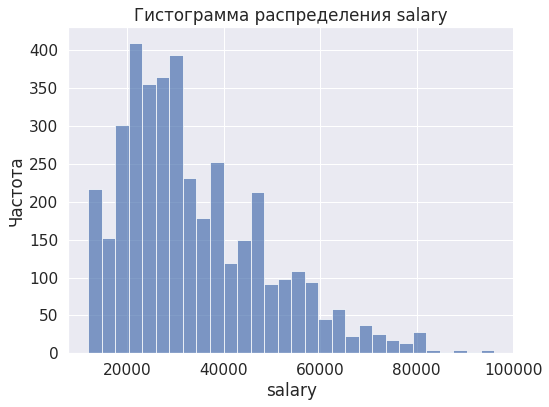

In [79]:
for column in train_quit.columns:
    if (train_quit[column].dtype != 'object') and (column != 'id'):  
        value_counts = train_quit[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(train_quit[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show() 

Выбросов и аномалий не заметно, данные подобны данным из первой задачи 

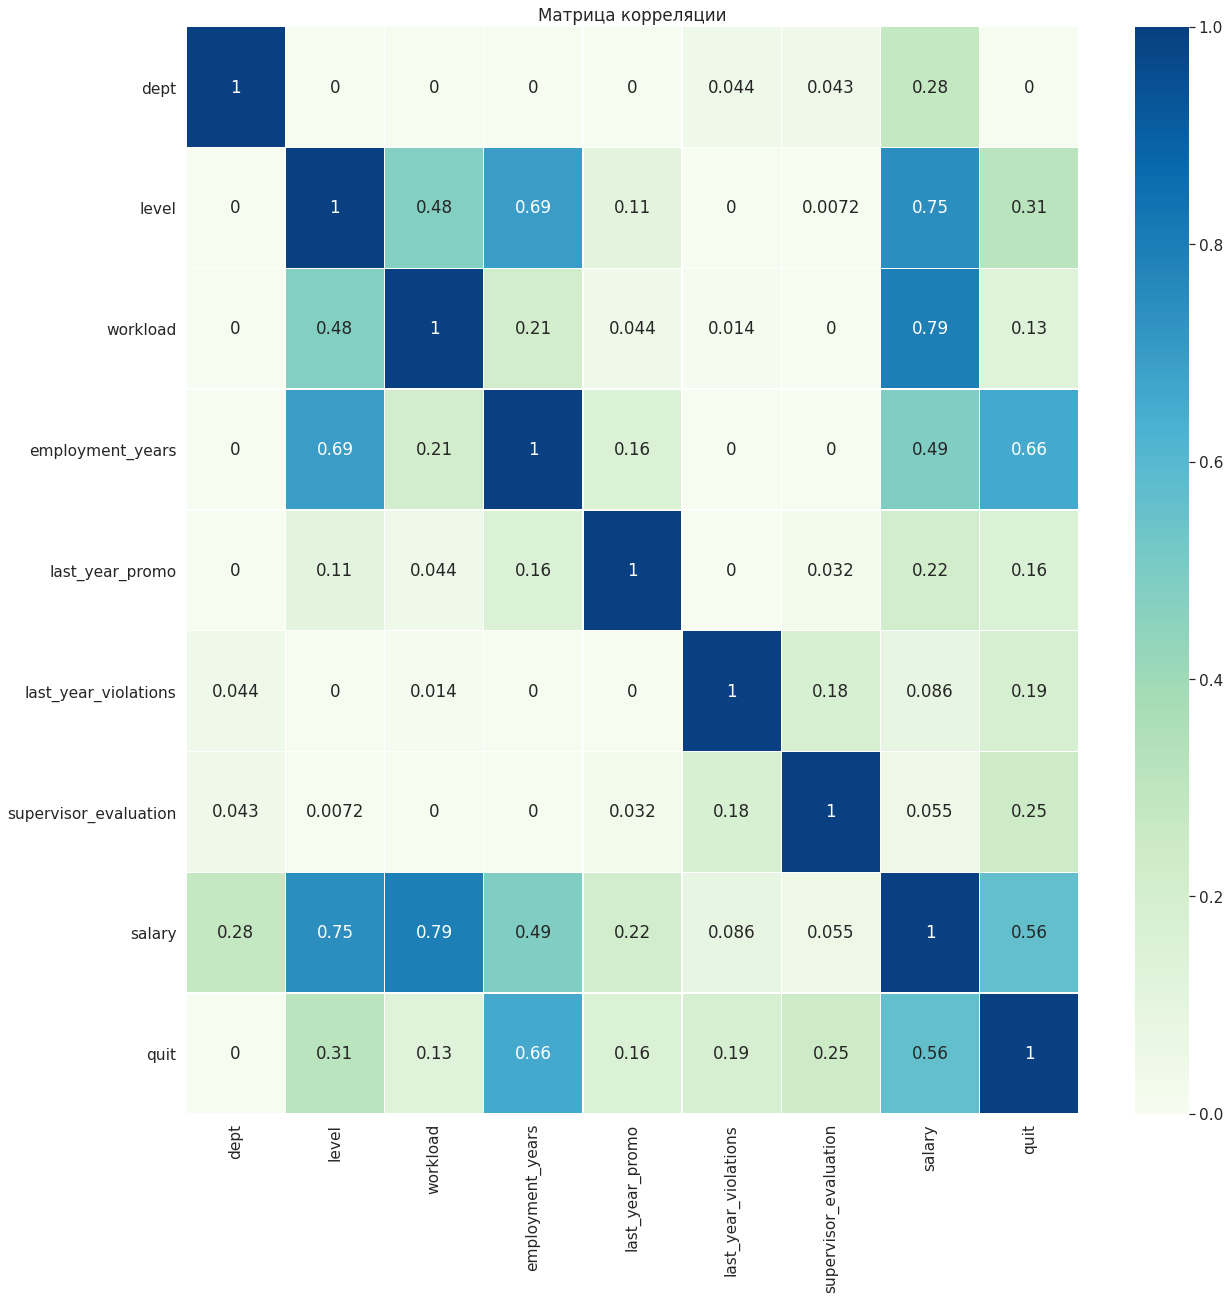

In [80]:
train_quit_1=train_quit.drop(['id'], axis=1)
corr_matrix = train_quit_1.phik_matrix(interval_cols = num_col)
sns.set(font_scale=1.4)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')
plt.title('Матрица корреляции')
plt.show()

По матрице корреляций заметна зависимость увольнениц от количества проработанных лет и от зарплаты, менее - от уровня сотрудника 

Входные признаки тестовой выборки те же, что и в прошлой задаче, поэтому не будем их анализировать еще раз. 

Составим портрет уволившегося сотрудника. Для этого сначала создадим датафрейм с такими сотрудниками. 

In [81]:
quited=train_quit[train_quit['quit'] == 'yes'] 

In [82]:
quited.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


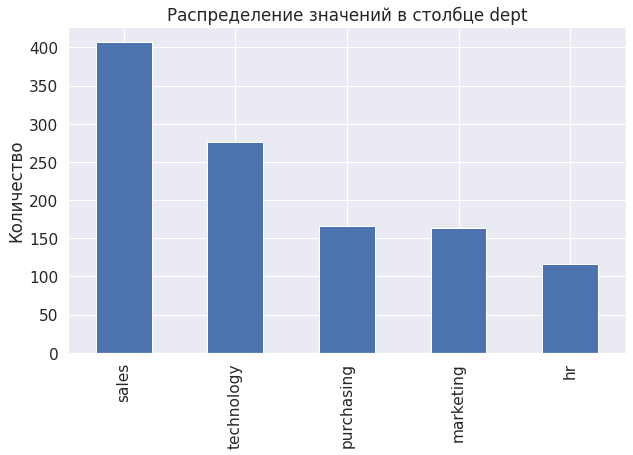

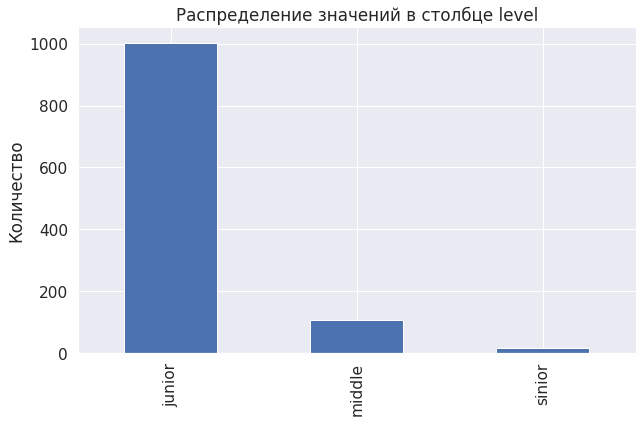

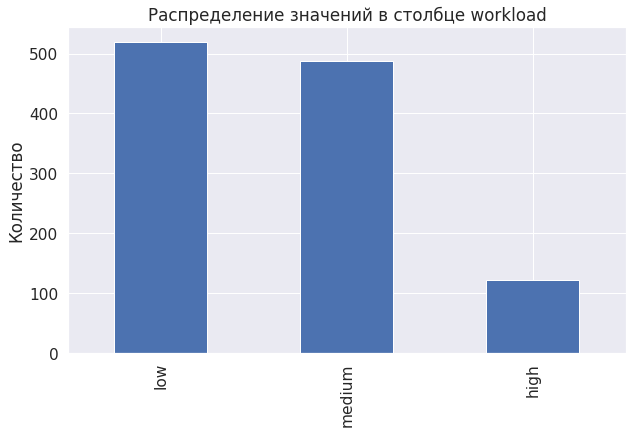

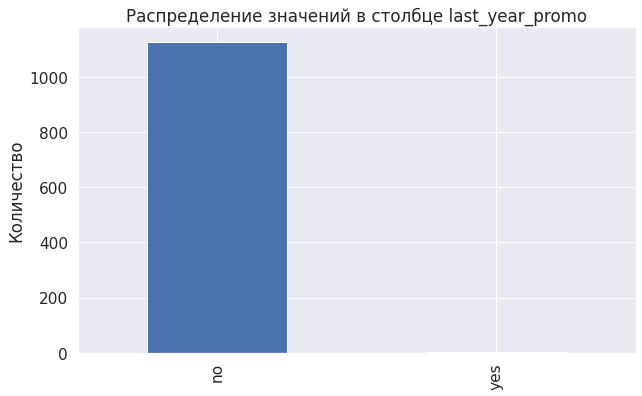

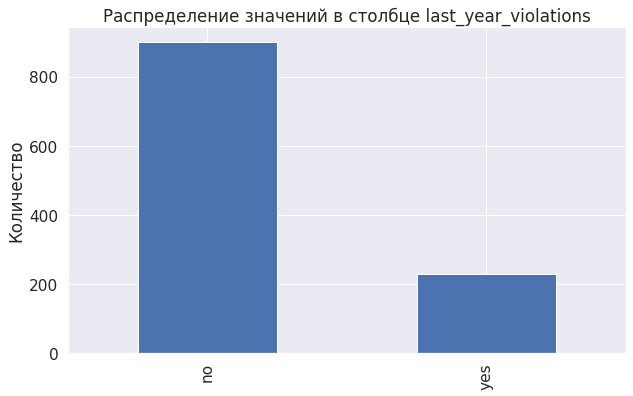

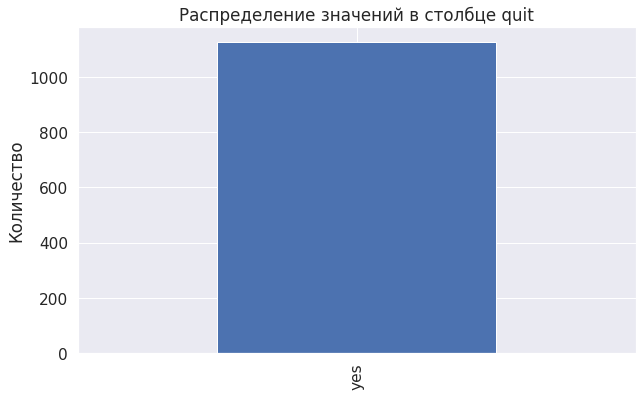

In [83]:
for column in quited.columns:
    if quited[column].dtype == 'object':  
            value_counts = quited[column].value_counts()

            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Распределение значений в столбце {column}')
            plt.ylabel('Количество')
            plt.show() 

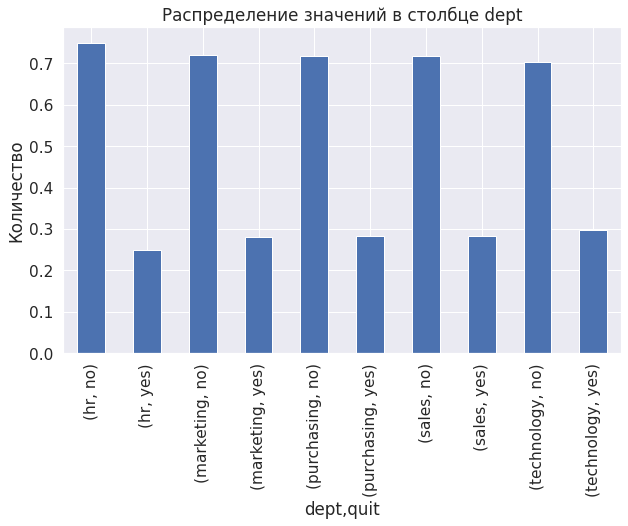

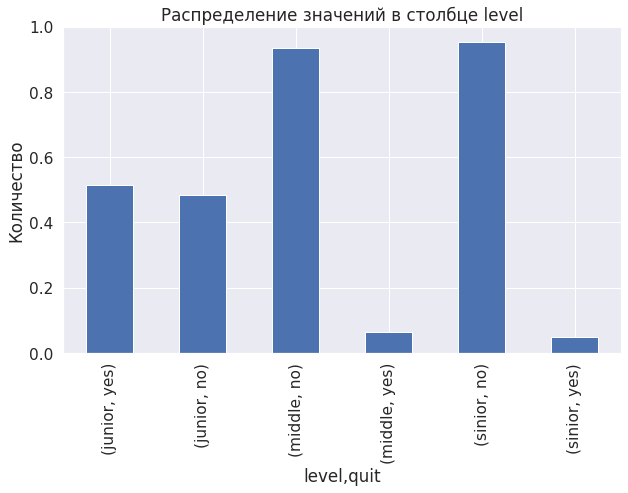

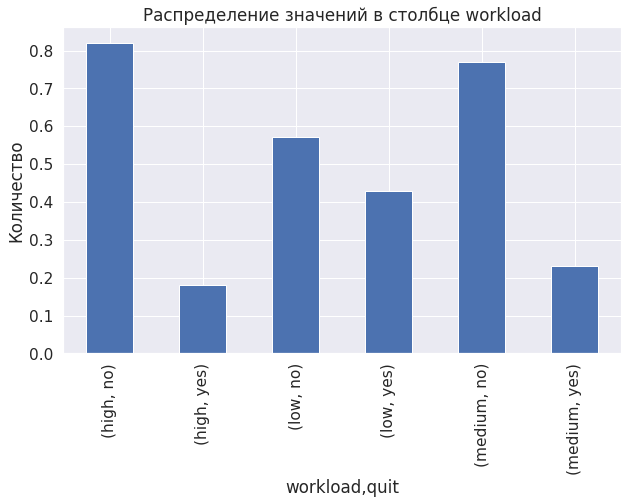

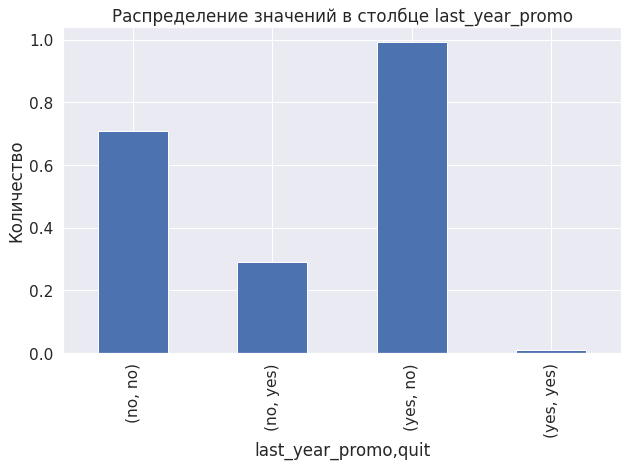

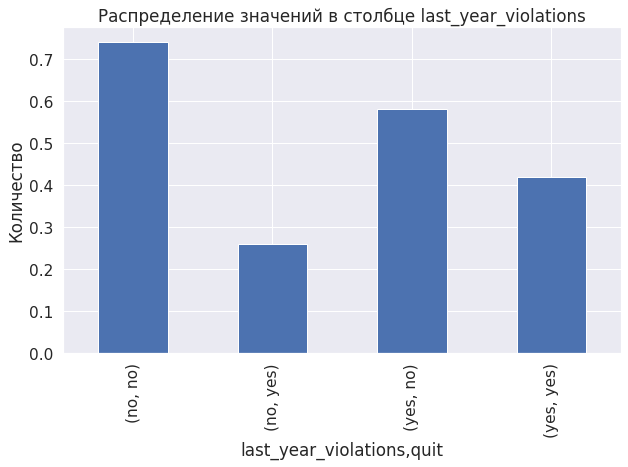

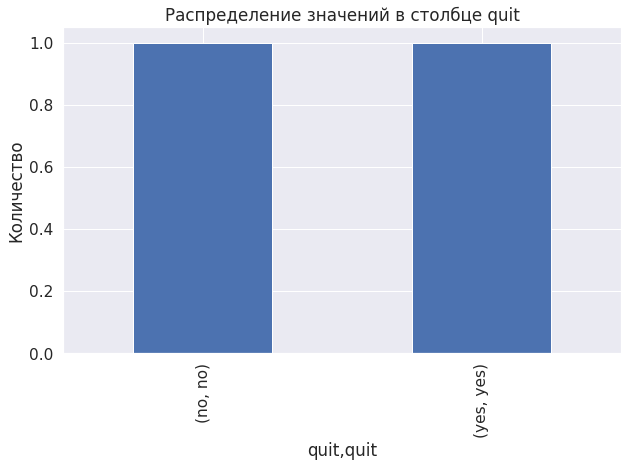

In [84]:
for column in train_quit.columns:
    if train_quit[column].dtype == 'object':  
            value_counts = train_quit.groupby(column)['quit'].value_counts(normalize=True)

            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Распределение значений в столбце {column}')
            plt.ylabel('Количество')
            plt.show() 

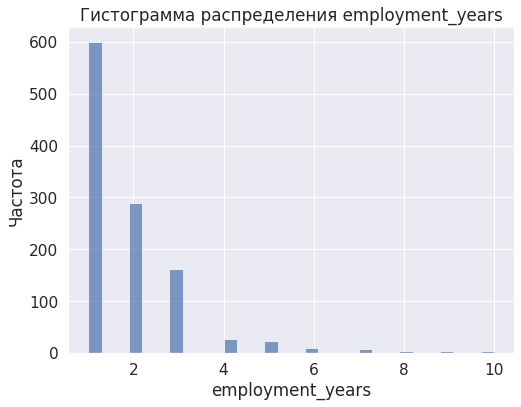

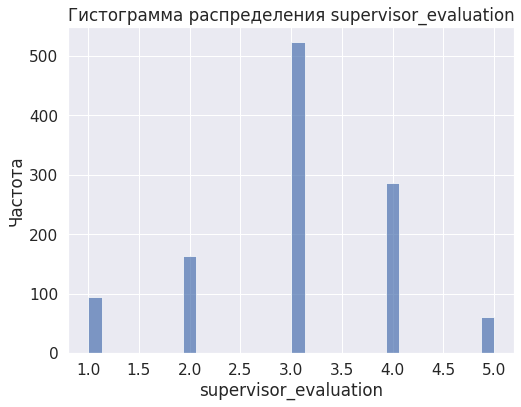

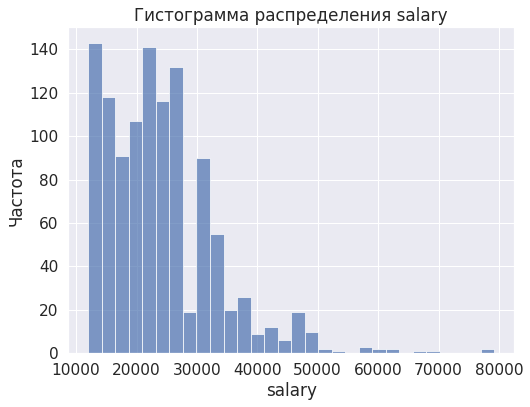

In [85]:
for column in quited.columns:
    if (quited[column].dtype != 'object') and (column != 'id'):  
        value_counts = quited[column].value_counts() 
        
        plt.figure(figsize=(8, 6))
        plt.hist(quited[column], bins=30, alpha=0.7)
        plt.title(f'Гистограмма распределения {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show() 

In [86]:
quited['salary'].describe() 

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

In [87]:
train_quit['salary'].describe() 

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

По графикам можно составить портрет уволившегося сотрудника - чаще всего это люди из отдела hr, проработавшие на начальной позиции junior до года включительно, соответственно с меньшего зарплатой (в среднем 23885 против 33806 в среднем по компании) и получившие оценку руководителя 3 (по компании в среднем 4). В обшем новички, которых не поддержали и видимо не помогли, как обычно и бывает. Либо которые ждали стремительного роста и повышения, чего обычно тоже не случается и они разочаровались. 

Теперь проверим, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. 

In [88]:
target_all = test_target.merge(test_target_quit, on='id')
target_all_yes=target_all[target_all['quit'] == 'yes']
target_all_no=target_all[target_all['quit'] == 'no'] 

In [89]:
target_all.head() 


,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes


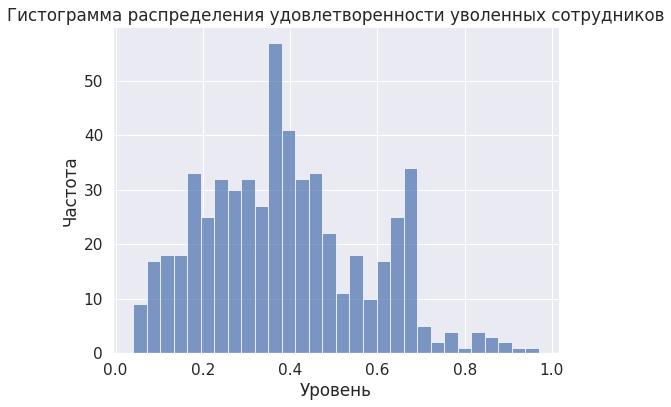

In [90]:
value_counts = target_all_yes['job_satisfaction_rate'].value_counts() 
plt.figure(figsize=(8, 6))
plt.hist(target_all_yes['job_satisfaction_rate'], bins=30, alpha=0.7)
plt.title(f'Гистограмма распределения удовлетворенности уволенных сотрудников')
plt.xlabel('Уровень')
plt.ylabel('Частота')
plt.grid(True)
plt.show() 

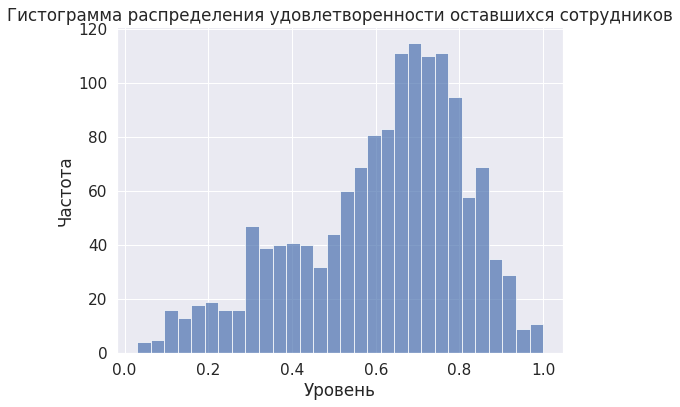

In [91]:
value_counts = target_all_no['job_satisfaction_rate'].value_counts() 
plt.figure(figsize=(8, 6))
plt.hist(target_all_no['job_satisfaction_rate'], bins=30, alpha=0.7)
plt.title(f'Гистограмма распределения удовлетворенности оставшихся сотрудников')
plt.xlabel('Уровень')
plt.ylabel('Частота')
plt.grid(True)
plt.show() 

In [92]:
target_all_yes['job_satisfaction_rate'].describe() 

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

In [93]:
target_all_no['job_satisfaction_rate'].describe() 

count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

Очевидно, что уволившиеся сотрудники имели низкий уровень удовлетворенности работой - 0.38 в среднем против 0.61 у оставшихся. 

Исследовательский анализ данных показал, что чаще всего увольняются люди из отдела sales, проработавшие на начальной позиции junior год, соответственно с меньшего зарплатой (в среднем 23885 против 33806 в среднем по компании) и получившие оценку руководителя 3 (по компании в среднем 4). Без повышений. Их уворень удовлетворенности работой значительно ниже (0.38), чем у оставшихся (0.61), что логично, это можно было предвидеть и удержать их. 

## Шаг 4. Добавление нового входного признака 

Добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи. 

In [94]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit) 

In [95]:
train_quit.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.637273
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


In [96]:
test_features['job_satisfaction_rate'] = best_model.predict(test_features) 

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [97]:
test_features.head() 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.885000
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.652000
3,418655,sales,middle,low,6,no,no,4,19200,0.666000
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556


## Шаг 5. Подготовка данных 

Подготовку проведём в пайплайне на следующем шаге. Необходимо сделать:

- кодировать с помощью OneHotEncoder: dept, last_year_promo, last_year_violations 
- кодировать с помощью OrdinalEncoder: level, workload 
- масштабировать количественные признаки: employment_years, supervisor_evaluation, salary, job_satisfaction_rate 


## Шаг 6. Обучение модели 

In [98]:
all_target_features = test_target_quit.merge(test_features, on='id', how='left')
display(all_target_features.head()) 

,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.268
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.206
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.600
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.684
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.495


In [99]:
train_quit['quit'] = train_quit['quit'].apply(lambda x: 1 if x =='yes' else 0)
train = train_quit.drop(['id'], axis=1)
train.drop_duplicates(inplace=True)

test = all_target_features.drop(['quit','id'], axis=1)

target = all_target_features['quit'] 

In [100]:
RANDOM_STATE = 100
TEST_SIZE = 0.25

X_train = train.drop('quit', axis=1)
y_train = train['quit'] 
X_test = test
y_test = target

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [101]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

In [102]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [103]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier())
])

In [104]:
param_grid = [

    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']    
    },

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 15),
        'models__max_features': range(5, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]


In [105]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

In [106]:
simplefilter(action='ignore', category=FutureWarning)

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(steps=[...
                         {'models': [DecisionTreeClassifier(random_state=100)],
                          'models__max_depth': range(5, 15),
                          'models__max_features': range(5, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [KNeighborsClassifier(n_neighbors=19)],
                          'models__n_neighbors': range(10, 20),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [108]:
best_model = grid_search.best_estimator_
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print(f'Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: {round(grid_search.best_score_,4)}') 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                   

In [109]:
result = pd.DataFrame(grid_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(10))

     rank_test_score                              param_models  \
330                1      KNeighborsClassifier(n_neighbors=19)   
324                2      KNeighborsClassifier(n_neighbors=19)   
327                3      KNeighborsClassifier(n_neighbors=19)   
321                4      KNeighborsClassifier(n_neighbors=19)   
315                5      KNeighborsClassifier(n_neighbors=19)   
318                6      KNeighborsClassifier(n_neighbors=19)   
312                7      KNeighborsClassifier(n_neighbors=19)   
309                8      KNeighborsClassifier(n_neighbors=19)   
17                 9  DecisionTreeClassifier(random_state=100)   
16                 9  DecisionTreeClassifier(random_state=100)   

     mean_test_score                                             params  
330         0.905966  {'models': KNeighborsClassifier(n_neighbors=19...  
324         0.904940  {'models': KNeighborsClassifier(n_neighbors=19...  
327         0.904899  {'models': KNeighborsClassifi

In [110]:
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),4)}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9147


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Была отобрана лучшая модель - KNeighborsClassifier(n_neighbors=19) 
Метрика ROC-AUC на тестовой выборке: 0.9178, что удволетвоет условию (ROC-AUC >= 0.91 на тестовой выборке) 

## Общие выводы 

Было проведено исследование для компании «Работа с заботой», которая занимается HR вопросами и  помогает бизнесу оптимизировать управление персоналом. 
Перед нами стояли 2 задачи: 
1. Предсказать уровень удовлетворенности сотрудника, используя предоставленные заказчиком признаки.  
Для решения этой задачи были проведены следующие шаги: 
- загружены и продобработаны имеющиеся данные: проведена проверка на дубликаты, пропуски были заменены на nan значения 
- проведен исследовательский анализ данных: выбросов и аномалий не найдено, изучено распределние признаков 
- обучены модели и найдена лучшая модель - это DecisionTreeRegressor(max_depth=17, max_features=12, min_samples_split=12, random_state=42). Для этого была использована метрика SMAPE. 
Метрика SMAPE лучшей модели на тренировочных данных: 15.2016
Метрика SMAPE лучшей модели на тестовой выборке: 13.6706, что удовлетворяет условию (по тз не более 15) 

2. Вторая задача состояла в том, чтобы предсказать увольнение сотрудника из компании 
- были получены данные, загуржены и обработаны аналогично первой задаче 
- на этапе постоения модели была использована метрика ROC-AUC, что и требовало условие, ее значение на тестовой выборке должно было быть не менее 0.91. Чего мы и достигли, выбрав модель KNeighborsClassifier(n_neighbors=19), метрика ROC-AUC на тестовой выборке для которой составила 0.9178 

Также, был составлен портрет сотрудника, который чаще всего увольняется. Это джун, проработавший в компании около 1 года, не получивший за этот год повышений и имеющий посредственный критерий оценки руководителем (3). Можно предположить 2 хода событий: 
- новый сотрудник не получал достаточно помощи и поддержки от коллег, что бывает часто, когда старички не хотят делиться знаниями. Разочаровался, не понимая, как делать задачи, психанул и ушел. Как предложение - поднять мотивацию опытным сотрудникам, например получать баллы за онбординг и введение нового сотрудника в курс дела, которые можно использовать на какой-либо мерч или другие цели. Как и делают некоторые компании. 
- более сложный случай, когда сотрудник ожидал молниеносного роста и повышений с первого года работы. Здесь нужно привлекать специалистов с психологическим уклоном и возможно пытаться задержать сотрудника хорошей атмосферой в компании, что поможет удержать не только целевую группу. 

В любом случае, нужно следить за уровнем удовлетворенности работой сотрудников, так как у уволившихся она значительно ниже (0.38), чем у оставшихся (0.61) и принимать какие-то меры своевременно. 